In [1]:
import requests
from bs4 import BeautifulSoup
from lxml import etree


In [ ]:
for year in ['2017', '2018', '2019']:
    outer_url = 'https://www.nbascoutinglive.com/ + ' + year + '-scouting-reports/'

    soup = BeautifulSoup(r, 'lxml')


In [10]:
url = 'https://www.nbascoutinglive.com/2018-scouting-reports/'
r = requests.get(url).text
soup = BeautifulSoup(r, 'lxml')

In [11]:
outer_html = soup.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})


In [12]:
outer_html[2].find_all('a')

[<a href="http://nbascoutinglive.com/liangelo-ball-scouting-report">LiAngelo Ball</a>,
 <a href="http://nbascoutinglive.com/billy-preston-scouting-report">Billy Preston</a>,
 <a href="http://nbascoutinglive.com/mitchell-robinson-scouting-report">Mitchell Robinson</a>,
 <a href="http://nbascoutinglive.com/anfernee-simons-scouting-report">Anfernee Simons</a>]

In [13]:
links = []
for i in range(3):
    for j in outer_html[i]:
        links.append(j.find_all('a'))

In [21]:
len(links[0])

0

In [14]:
for link in links:
    if len(link) == 0:
        links.remove(link)

In [99]:
#links[1][0] = links[1][0]['href']
#links

In [15]:
link2 = []
for link in links:
    link2.append(link[0]['href'])

In [188]:
import time
word_list = []
for link in link2:
    parse_every_player(link, word_list)
    time.sleep(0.5)

IndexError: list index out of range

In [187]:

def parse_every_player(link, word_list):
    r2 = requests.get(link).text
    soup2 = BeautifulSoup(r2,'lxml')

    for i in soup2.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})[2].find_all('p'):
        #print(i)
        if '<a' not in str(i):
            word_list.append(i.text)

    word_list = word_list[:-1]


In [191]:

r2 = requests.get('https://www.nbascoutinglive.com/rawle-alkins-scouting-report/').text
soup2 = BeautifulSoup(r2,'lxml')



In [196]:
word = []
for i in soup2.find_all('div',{'class': 'elementor-text-editor elementor-clearfix'})[2].find_all('p'):
    #print(i)
    if '<a' not in str(i):
        word.append(i.text)

word = word[:-1]

In [8]:
from selenium import webdriver
import time

In [16]:
browser = webdriver.Chrome()
get_html = 'test.html'


for link in link2:
    f = open(get_html, 'ab')
    browser.get(link)
    f.write(browser.page_source.encode('utf-8','ignore'))
    f.close()
browser.close()

In [2]:
#html = open(,'r',encoding='utf-8')

In [3]:
#htmlhandler = html.read()

In [17]:
html = etree.parse('test.html', etree.HTMLParser())
#result = etree.tostring(html)

In [22]:
#html.xpath('//div[@class="elementor-text-editor elementor-clearfix"]//p/text()')

In [45]:
wordbag = html.xpath('//h5/ancestor::div[@class="elementor-text-editor elementor-clearfix"]//p/text()')

In [46]:
import re
pattern = re.compile('[^a-zA-Z]')
for i in wordbag:
    i = re.sub(pattern, ' ',i)

In [47]:
word_str = ' '.join(wordbag)

In [54]:
word_2_str

'Height      Weight      College  Arizona Classification  Senior Birthdate                   Top     Prospect Rank   Projected Draft Range   nd Round to Undrafted      NBA Draft   Good scorer off the dribble Decent shooter off the catch Excels at scoring on the move Decent playmaker Good defensive player Solid athlete Has very good intangibles Streaky shooter Can be careless on offense  which can lead to turnovers Needs to improve his rebounding Can have occasional lapses defensively Not a true point guard  but is undersized to play the two Overshadowed by higher profile teammates Old for a draft prospect  may have limited upside Kadeem Allen is an athletic  skilled combo guard that can score the basketball   It is uncertain if he can effectively run the point at the next level  or if his skills will translate to the league  but he has been having a solid senior season  and he will likely end up on an NBA summer league roster  Links  Games Scouted  Height        Weight      College  Ar

In [49]:
word_2_str = re.sub(pattern, ' ', word_str)

In [55]:
from nltk.corpus import stopwords 
#remove stopwords
word_2_str = word_2_str.lower()
words = word_2_str.split(' ')
words = [w for w in words if not w in set(stopwords.words('english'))]

In [27]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [38]:
for i in words:
    if len(i) == 0:
        words.remove(i)

In [41]:
#words

In [58]:
word_str = ' '.join(words)

In [60]:
#word_str

In [47]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

words = word_tokenize(word_str)

for word in words:
    print(word + ":" + ps.stem(word))

gifted:gift
scorer:scorer
dribbledecent:dribbledec
shooter:shooter
floorexcels:floorexcel
scoring:score
movetremendous:movetremend
free:free
throw:throw
generatorprolific:generatorprolif
scorer:scorer
put:put
points:point
willadequate:willadequ
playmakerdecent:playmakerdec
rebounder:rebound
player:player
sizedecent:sizedec
defensive:defens
playergreat:playergreat
athletetough:athletetough
smart:smart
player:player
good:good
intangiblesstreaky:intangiblesstreaki
shootercan:shootercan
prone:prone
hoisting:hoist
questionable:question
shotscan:shotscan
tend:tend
hold:hold
ball:ball
longcan:longcan
turnover:turnov
pronecan:pronecan
play:play
wildly:wildli
offensecan:offensecan
scoring:score
focused:focus
offensemay:offensemay
bit:bit
undersized:unders
play:play
pointcollin:pointcollin
sexton:sexton
vastly:vastli
athletic:athlet
point:point
guard:guard
could:could
potentially:potenti
top:top
pick:pick
nba:nba
draft:draft
gifted:gift
shot:shot
creator:creator
get:get
many:mani
scores:score
dr

defensivelyplayed:defensivelyplay
zone:zone
defensive:defens
schememarvin:schememarvin
bagley:bagley
iii:iii
poised:pois
running:run
top:top
pick:pick
along:along
zion:zion
williamson:williamson
r:r
j:j
barrett:barrett
opted:opt
instead:instead
reclassify:reclassifi
order:order
play:play
college:colleg
basketball:basketbal
season:season
bagley:bagley
skilled:skill
scorer:scorer
dynamo:dynamo
transition:transit
ball:ball
hawk:hawk
glass:glass
also:also
good:good
shot:shot
blocker:blocker
since:sinc
decided:decid
commit:commit
duke:duke
bagley:bagley
talented:talent
basketball:basketbal
player:player
could:could
end:end
number:number
one:one
overall:overal
pick:pick
strong:strong
finisher:finish
around:around
basketgood:basketgood
low:low
post:post
scorerexcels:scorerexcel
scoring:score
moveadequate:moveadequ
scorer:scorer
dribbleadequate:dribbleadequ
shooter:shooter
stretch:stretch
big:big
potentialadequate:potentialadequ
playmaker:playmak
big:big
manhas:manha
good:good
handsgifted:hand

good:good
scorer:scorer
dribbleexcels:dribbleexcel
scoring:score
movevery:moveveri
good:good
free:free
throw:throw
shooterfairly:shooterfairli
good:good
playmakeradequate:playmakeradequ
rebounderadequate:rebounderadequ
defensive:defens
playersolid:playersolid
athletestreaky:athletestreaki
shooterlacks:shooterlack
elite:elit
first:first
step:step
dribblecan:dribblecan
careless:careless
offense:offens
lead:lead
turnoverscan:turnoverscan
pick:pick
quick:quick
foulsmust:foulsmust
add:add
strengthonly:strengthonli
average:averag
size:size
positiondevonte:positiondevont
graham:graham
agile:agil
skilled:skill
point:point
guard:guard
good:good
set:set
around:around
skills:skill
score:score
variety:varieti
ways:way
sound:sound
distributor:distributor
effectively:effect
run:run
team:team
graham:graham
offensively:offens
skilled:skill
player:player
really:realli
good:good
games:game
may:may
doubts:doubt
dynamic:dynam
playmaker:playmak
next:next
level:level
concerns:concern
may:may
system:system
p

project:project
solid:solid
defensive:defens
player:player
next:next
level:level
combined:combin
satisfactory:satisfactori
scoring:score
skills:skill
could:could
end:end
long:long
career:career
nba:nba
links:link
active:activ
finisher:finish
around:around
basketfairly:basketfairli
good:good
shooter:shooter
floorfairly:floorfairli
good:good
low:low
post:post
scoreradequate:scoreradequ
scorer:scorer
dribblegood:dribblegood
free:free
throw:throw
shootertremendous:shootertremend
free:free
throw:throw
generatordecent:generatordec
playmaker:playmak
big:big
mangood:mangood
rebounderadequate:rebounderadequ
defensive:defens
playersolid:playersolid
shot:shot
blockergifted:blockergift
athletehas:athleteha
long:long
wingspanhas:wingspanha
good:good
intangiblesstreaky:intangiblesstreaki
shootermay:shootermay
need:need
tweak:tweak
shooting:shoot
mechanicscan:mechanicscan
turnover:turnov
pronecan:pronecan
passive:passiv
offensedoes:offensedo
always:alway
commit:commit
boardscan:boardscan
undiscipline

player:player
dialed:dial
however:howev
tend:tend
lapses:laps
prevent:prevent
obtaining:obtain
extra:extra
boards:board
getting:get
stops:stop
times:time
right:right
bates:bate
diop:diop
may:may
jack:jack
trades:trade
type:type
player:player
may:may
elite:elit
one:one
skill:skill
skill:skill
set:set
could:could
end:end
effective:effect
role:role
player:player
nba:nba
links:link
good:good
post:post
guardadequate:guardadequ
scorer:scorer
dribbleexcels:dribbleexcel
scoring:score
moveadequate:moveadequ
playmakergood:playmakergood
rebounder:rebound
sizefairly:sizefairli
good:good
defensive:defens
playerhas:playerha
good:good
strengthneeds:strengthne
improve:improv
shootingmust:shootingmust
extend:extend
shooting:shoot
rangebad:rangebad
free:free
throw:throw
shootercan:shootercan
bit:bit
foul:foul
pronenot:pronenot
elite:elit
athleteplays:athleteplay
like:like
undersized:unders
big:big
manjae:manja
sean:sean
tate:tate
tough:tough
physical:physic
combo:combo
guard:guard
attack:attack
basket:b

free:free
throw:throw
shootingmay:shootingmay
need:need
improve:improv
passing:pass
abilitynot:abilitynot
elite:elit
athletemay:athletemay
outstanding:outstand
one:one
particular:particular
skilldesi:skilldesi
rodriguez:rodriguez
smart:smart
skilled:skill
swingman:swingman
could:could
project:project
type:type
player:player
nba:nba
good:good
senior:senior
season:season
could:could
end:end
potential:potenti
second:second
round:round
pick:pick
good:good
scorer:scorer
dribblegood:dribblegood
shooter:shooter
floorvery:floorveri
good:good
free:free
throw:throw
shootergood:shootergood
playmaker:playmak
run:run
pointgood:pointgood
defensive:defens
playersolid:playersolid
athletesmart:athletesmart
player:player
good:good
feel:feel
gamegreat:gamegreat
size:size
play:play
either:either
backcourt:backcourt
positionstreaky:positionstreaki
shooterunselfish:shooterunselfish
faultcan:faultcan
careless:careless
offense:offens
lead:lead
turnoversneeds:turnoversne
improve:improv
reboundingcan:rebounding

regularly:regularli
finish:finish
plays:play
paint:paint
also:also
patient:patient
playmaker:playmak
set:set
plenty:plenti
scores:score
team:team
skill:skill
set:set
could:could
potentially:potenti
end:end
effective:effect
role:role
player:player
nba:nba
links:link
excels:excel
scoring:score
movefairly:movefairli
good:good
scorer:scorer
dribbledecent:dribbledec
shooter:shooter
floorfairly:floorfairli
good:good
playmakergood:playmakergood
reboundergood:reboundergood
defensive:defens
player:player
get:get
stealssolid:stealssolid
athletestreaky:athletestreaki
shootercan:shootercan
passive:passiv
offensecan:offensecan
careless:careless
offense:offens
lead:lead
turnoversplays:turnoversplay
zone:zone
defensive:defens
schemerelative:schemerel
unknown:unknown
commodityhas:commodityha
played:play
game:game
action:action
seasonde:seasond
anthony:anthoni
melton:melton
athletic:athlet
point:point
guard:guard
strong:strong
freshman:freshman
season:season
fill:fill
blanks:blank
around:around
contrib

may:may
possess:possess
ideal:ideal
athleticism:athletic
defensive:defens
skills:skill
player:player
size:size
kanter:kanter
may:may
skills:skill
end:end
solid:solid
addition:addit
nba:nba
team:team
summer:summer
league:leagu
roster:roster
links:link
games:game
scouted:scout
good:good
scorer:scorer
dribbleadequate:dribbleadequ
shooter:shooter
floorexcels:floorexcel
scoring:score
movecan:movecan
post:post
smaller:smaller
playersvery:playersveri
good:good
free:free
throw:throw
shooteradequate:shooteradequ
playmakeradequate:playmakeradequ
rebounderdecent:rebounderdec
defensive:defens
player:player
get:get
stealsstreaky:stealsstreaki
shootercan:shootercan
display:display
spotty:spotti
shot:shot
selectiondoes:selectiondo
always:alway
commit:commit
boardsmay:boardsmay
struggle:struggl
guard:guard
quicker:quicker
playersonly:playersonli
average:averag
athletemay:athletemay
bit:bit
undersized:unders
play:play
wingj:wingj
p:p
macura:macura
skilled:skill
swingman:swingman
shoot:shoot
score:score

throw:throw
generatorvery:generatorveri
good:good
free:free
throw:throw
shooterdecent:shooterdec
playmakergood:playmakergood
athleteplays:athleteplay
one:one
toughest:toughest
professional:profession
leaguesinconsistent:leaguesinconsist
shooterstruggles:shooterstruggl
score:score
trafficmay:trafficmay
lack:lack
elite:elit
first:first
step:step
dribblemay:dribblemay
shot:shot
selection:select
issuesneeds:issuesne
improve:improv
passing:pass
abilityneeds:abilityne
improve:improv
reboundingneeds:reboundingne
improve:improv
defensenot:defensenot
elite:elit
athletemust:athletemust
add:add
strengthhas:strengthha
played:play
much:much
highest:highest
levelsmarc:levelsmarc
garcia:garcia
athletic:athlet
skilled:skill
swingman:swingman
currently:current
playing:play
one:one
toughest:toughest
professional:profession
basketball:basketbal
leagues:leagu
around:around
world:world
considered:consid
one:one
top:top
international:intern
prospects:prospect
years:year
earlier:earlier
garcia:garcia
plagued

defensive:defens
specialist:specialist
nba:nba
good:good
rebounder:rebound
shot:shot
blocker:blocker
excels:excel
rim:rim
protector:protector
team:team
offensively:offens
though:though
may:may
far:far
polished:polish
end:end
ably:abli
score:score
hustle:hustl
plays:play
right:right
projects:project
second:second
round:round
prospect:prospect
upcoming:upcom
draft:draft
excellent:excel
shot:shot
blocking:block
skills:skill
vast:vast
athletic:athlet
ability:abil
could:could
intrigue:intrigu
nba:nba
teams:team
need:need
improve:improv
offensively:offens
improve:improv
chances:chanc
long:long
productive:product
career:career
association:associ
links:link
games:game
scouted:scout
height:height
weight:weight
college:colleg
baylorclassification:baylorclassif
juniorbirthdate:juniorbirthd
top:top
prospect:prospect
rank:rank
projected:project
draft:draft
range:rang
nd:nd
roundactive:roundact
finisher:finish
around:around
basketexcels:basketexcel
scoring:score
movegood:movegood
low:low
post:post
s

right:right
giles:gile
working:work
way:way
back:back
lineup:lineup
looking:look
clear:clear
may:may
polished:polish
player:player
anticipated:anticip
nba:nba
teams:team
scouts:scout
like:like
talent:talent
upside:upsid
may:may
still:still
rate:rate
high:high
draft:draft
boards:board
good:good
scorer:scorer
dribblegood:dribblegood
shooter:shooter
floorexcels:floorexcel
scoring:score
movevery:moveveri
good:good
free:free
throw:throw
shooterdecent:shooterdec
rebounderadequate:rebounderadequ
defensive:defens
playergreat:playergreat
athletemay:athletemay
significant:signific
upsideinconsistent:upsideinconsist
shootercan:shootercan
prone:prone
hoisting:hoist
questionable:question
shotsneeds:shotsne
improve:improv
passing:pass
abilitycan:abilitycan
position:posit
defensivelycan:defensivelycan
pick:pick
quick:quick
foulsnot:foulsnot
true:true
point:point
guard:guard
undersized:unders
play:play
twocan:twocan
inconsistent:inconsist
gamescurrently:gamescurr
undergoing:undergo
foot:foot
surgeryfr

sensational:sensat
passes:pass
set:set
scoring:score
chances:chanc
teammates:teammat
hand:hand
streaky:streaki
shooter:shooter
possess:possess
ideal:ideal
size:size
play:play
point:point
nba:nba
could:could
hurt:hurt
defensively:defens
next:next
level:level
great:great
motor:motor
helps:help
assessing:assess
overall:overal
prospect:prospect
dewayne:dewayn
russell:russel
may:may
likely:like
drafted:draft
skills:skill
good:good
addition:addit
nba:nba
team:team
summer:summer
league:leagu
roster:roster
year:year
links:link
games:game
scouted:scout
height:height
weight:weight
college:colleg
harvardclassification:harvardclassif
seniorbirthdate:seniorbirthd
projected:project
draft:draft
range:rang
likely:like
undrafted:undraft
decent:decent
shooter:shooter
floordecent:floordec
scorer:scorer
dribblevery:dribbleveri
good:good
free:free
throw:throw
shootergood:shootergood
playmakerdecent:playmakerdec
defensive:defens
player:player
get:get
stealsbetter:stealsbett
advertised:advertis
athletesmart:

needs:need
improve:improv
shootingbelow:shootingbelow
average:averag
free:free
throw:throw
shootercan:shootercan
scoring:score
focused:focus
offensecan:offensecan
lapses:laps
defensivelydoes:defensivelydo
collect:collect
enough:enough
steals:steal
blockscan:blockscan
commit:commit
bad:bad
foulsmay:foulsmay
overshadowed:overshadow
higher:higher
profile:profil
teammates:teammat
isaiah:isaiah
briscoe:brisco
skilled:skill
basketball:basketbal
player:player
possesses:possess
good:good
set:set
offensive:offens
skills:skill
excels:excel
attacking:attack
hoop:hoop
garner:garner
scores:score
paint:paint
makes:make
good:good
decisions:decis
ball:ball
hands:hand
also:also
fairly:fairli
good:good
defensive:defens
player:player
focused:focus
hand:hand
need:need
improve:improv
jump:jump
shot:shot
need:need
show:show
teams:team
consistent:consist
performer:perform
nightly:nightli
basis:basi
currently:current
rates:rate
bubble:bubbl
second:second
round:round
candidate:candid
upcoming:upcom
draft:draft

undrafted:undraft
active:activ
finisher:finish
around:around
basketgood:basketgood
scorer:scorer
dribblefairly:dribblefairli
good:good
low:low
post:post
scorerexcels:scorerexcel
scoring:score
movedecent:movedec
mid:mid
range:rang
shooterhas:shooterha
good:good
handsgood:handsgood
defensive:defens
playersolid:playersolid
athleterock:athleterock
solid:solid
motormust:motormust
extend:extend
shooting:shoot
rangemay:rangemay
need:need
improve:improv
reboundingmay:reboundingmay
potentially:potenti
tweenerneeds:tweenerne
add:add
strengthmay:strengthmay
one:one
year:year
wonderjacorey:wonderjacorey
williams:william
athletic:athlet
combination:combin
forward:forward
plays:play
high:high
energy:energi
brand:brand
basketball:basketbal
solid:solid
inside:insid
scorer:scorer
get:get
buckets:bucket
dribble:dribbl
post:post
well:well
hustle:hustl
plays:play
plus:plu
good:good
athletic:athlet
tools:tool
allow:allow
make:make
plays:play
defensively:defens
likely:like
may:may
need:need
improve:improv
s

scoring:score
moveadequate:moveadequ
low:low
post:post
scoreradequate:scoreradequ
playmakergifted:playmakergift
reboundergifted:reboundergift
defensive:defens
player:player
get:get
stealsexcellent:stealsexcel
shot:shot
blockergreat:blockergreat
athleteneeds:athletene
improve:improv
shootingdoes:shootingdo
shoot:shoot
ball:ball
enoughmay:enoughmay
struggle:struggl
create:creat
shot:shot
next:next
levelmay:levelmay
fairly:fairli
raw:raw
offensivelycan:offensivelycan
turnover:turnov
pronecan:pronecan
bit:bit
foul:foul
pronestruggles:pronestruggl
guard:guard
stronger:stronger
playersneeds:playersne
get:get
strongermissed:strongermiss
time:time
last:last
year:year
due:due
foot:foot
problemsjordan:problemsjordan
bell:bell
athletic:athlet
big:big
man:man
projects:project
defensive:defens
specialist:specialist
nba:nba
calling:call
card:card
defensive:defens
end:end
athletic:athlet
terrific:terrif
instincts:instinct
possesses:possess
ability:abil
guard:guard
opponents:oppon
perimeter:perimet
we

pronecan:pronecan
foul:foul
pronemay:pronemay
potentially:potenti
tweener:tweener
rashawn:rashawn
thomas:thoma
athletic:athlet
combination:combin
forward:forward
plays:play
lot:lot
energy:energi
get:get
plenty:plenti
points:point
rebounds:rebound
team:team
paint:paint
likely:like
need:need
improve:improv
jump:jump
shot:shot
overall:overal
skill:skill
level:level
refines:refin
overall:overal
game:game
could:could
potentially:potenti
excel:excel
two:two
way:way
player:player
next:next
level:level
links:link
games:game
scouted:scout
gifted:gift
shooter:shooter
quick:quick
releasefairly:releasefairli
good:good
scorer:scorer
dribblevery:dribbleveri
good:good
free:free
throw:throw
shooteris:shooteri
threat:threat
score:score
screensdecent:screensdec
playmakercan:playmakercan
struggle:struggl
finish:finish
plays:play
trafficlacks:trafficlack
elite:elit
first:first
step:step
dribbleneeds:dribblene
improve:improv
reboundingneeds:reboundingne
improve:improv
defensedoes:defensedo
collect:collect


undrafted:undraft
ability:abil
put:put
ball:ball
hoop:hoop
could:could
net:net
roster:roster
spot:spot
someone:someon
nba:nba
summer:summer
league:leagu
team:team
road:road
links:link
games:game
scouted:scout
good:good
scorer:scorer
dribbleexcels:dribbleexcel
scoring:score
movetremendous:movetremend
free:free
throw:throw
generatorgood:generatorgood
playmakerdecent:playmakerdec
rebounderadequate:rebounderadequ
defensive:defens
player:player
get:get
stealsgreat:stealsgreat
athleteversatile:athleteversatil
player:player
play:play
multiple:multipl
positionsneeds:positionsne
improve:improv
shootingcan:shootingcan
miss:miss
shots:shot
wildly:wildli
around:around
basketcan:basketcan
careless:careless
offense:offens
lead:lead
turnoverscan:turnoverscan
lapses:laps
defensivelyplays:defensivelyplay
zone:zone
defensive:defens
schememust:schememust
add:add
strengthhas:strengthha
substantial:substanti
knee:knee
injuriesedmond:injuriesedmond
sumner:sumner
athletic:athlet
combo:combo
guard:guard
posse

games:game
scouted:scout
strong:strong
finisher:finish
around:around
basketexcels:basketexcel
scoring:score
moveadequate:moveadequ
shooter:shooter
big:big
man:man
stretch:stretch
big:big
potentialadequate:potentialadequ
defensive:defens
playeradequate:playeradequ
shot:shot
blockergood:blockergood
athletegreat:athletegreat
size:size
play:play
centerhas:centerha
long:long
armshas:armsha
large:larg
handsplays:handsplay
toughest:toughest
professional:profession
leaguesmust:leaguesmust
expand:expand
upon:upon
low:low
post:post
movesbelow:movesbelow
average:averag
free:free
throw:throw
shooterneeds:shooterne
improve:improv
passing:pass
abilitycan:abilitycan
passive:passiv
offenseneeds:offensene
improve:improv
reboundingnot:reboundingnot
elite:elit
shot:shot
blockercan:blockercan
quite:quit
foul:foul
pronemust:pronemust
get:get
stronger:stronger
anzejs:anzej
pasecniks:pasecnik
playing:play
well:well
limited:limit
minutes:minut
toughest:toughest
professional:profession
leagues:leagu
around:aro

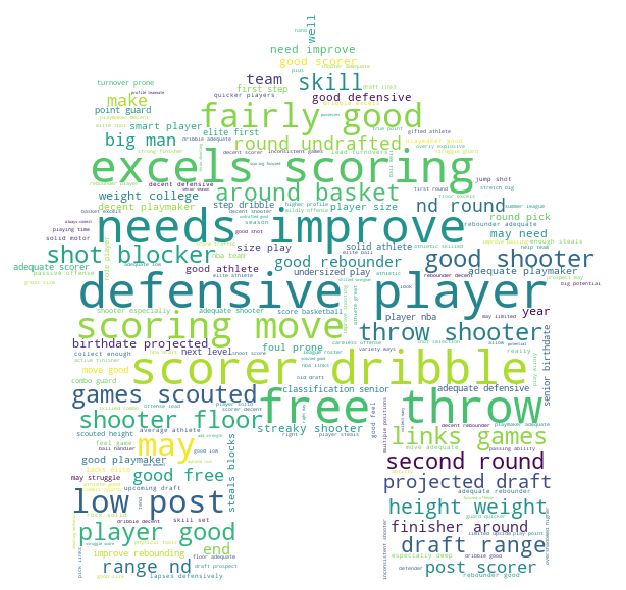

<Figure size 432x288 with 0 Axes>

In [63]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline


#words = 'access guest guest apartment area area bathroom bed bed bed bed bed bedroom block coffee coffee coffee coffee entrance entry francisco free garden guest home house kettle kettle kitchen kitchen kitchen kitchen kitchen kitchenliving located microwave neighborhood new park parking place privacy private queen room san separate seperate shared space space space street suite time welcome'
#f = open('scout1.json','r',encoding='utf-8')

mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', stopwords=STOPWORDS, mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    #plt.savefig('scout_wordcloud.png')
#Run the following to generate your wordcloud
generate_wordcloud(word_str, mask)
